<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/DFOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tifffile
import numpy as np
from google import colab
from matplotlib import pyplot as plt
import scipy

# # Open Bin Save
def get_drobox_file(new_filename, link):
    !wget -O $new_filename $link
    return new_filename


def bin_stack(im,bin_factor):
    height = im.shape[1] // bin_factor
    width = im.shape[2] // bin_factor
    im = im[:, :height * bin_factor, : width * bin_factor]
    im = im.reshape(im.shape[0], height, bin_factor, width, bin_factor)
    im = im.sum((2, 4), dtype='uint32')
    return im


def open_bin_save(db_link,new_name,bin_factor):
    print('importing')
    _ = get_drobox_file(new_name, db_link)
    print('reading')
    im = tifffile.imread('/content/'+new_name, maxworkers=6)
    print('binning')
    im = bin_stack(im, bin_factor)
    print('saving')
    tifffile.imwrite('/content/my_tiff_bin.tiff', im) #, imagej=True

    # !zip -r '/content/my_tiff_bin.zip' '/content/my_tiff_bin.tiff'

    print('downloading')
    colab.files.download('/content/my_tiff_bin.tiff')
    return im



In [2]:
new_name = 'my_tiff.tiff'
db_link = 'https://www.dropbox.com/s/25s9avjszghte1k/s3_cnt%5B1-5000_EX0%5D.TIF?dl=0'
bin_factor=10

_ = get_drobox_file(new_name, db_link)
im = tifffile.imread('/content/'+new_name, maxworkers=6)
im = bin_stack(im, bin_factor)


--2023-05-19 04:37:41--  https://www.dropbox.com/s/25s9avjszghte1k/s3_cnt%5B1-5000_EX0%5D.TIF?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/25s9avjszghte1k/s3_cnt%5B1-5000_EX0%5D.TIF [following]
--2023-05-19 04:37:42--  https://www.dropbox.com/s/raw/25s9avjszghte1k/s3_cnt%5B1-5000_EX0%5D.TIF
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b4a3771e70f8fc8ef95ff2a4b.dl.dropboxusercontent.com/cd/0/inline/B8Vtkge3cY4Cs3aIg7KXAnE7Vpz36upmFXSvsqxYqJ2qv9AOgG1LdgEbG4l8B3eoVsQvA3PcTDnPyR-VE4QHG4_yyeqV4XSmqE6PQ0J6CHCZJoeezytrDhYwuwT_5rZfvtYLosEP-sD6Tn3kOmG4QYwPU3SshECw7NBBdg6Wr2UNKQ/file# [following]
--2023-05-19 04:37:43--  https://uc6b4a3771e70f8fc8ef95ff2a4b.dl.dropboxusercontent.com/cd/0/inline/B8Vtkge3cY4Cs3aIg7KXAnE7Vpz36up

In [3]:
im_shape = im.shape
im = np.reshape(im, [im_shape[0], im_shape[1]*im_shape[2]])
print(im.shape)

im_r_std = np.expand_dims(np.std(im,axis=0),1)
im_r_avg = np.expand_dims(np.average(im,axis=0),1)
im = (im-im_r_avg.T)/im_r_std.T

# # f0 = 1200
# # im_r = im_r / im_r[f0,:]

# plt.imshow(im_r.T)
# plt.colorbar()
# plt.show()



(5000, 3600)


In [4]:
# [lo,me,hi] = np.percentile(im,[1,50,99],axis=1)

# fig,ax=plt.subplots()
# ax.plot(im,color='grey')
# ax.plot(lo,':k')
# ax.plot(hi,':k')
# ax.plot(me,'r')



In [5]:
# def exp_func(xdata,a,b,c):
#     return a*np.exp(xdata/-b) + c

# p0_1 = [3,2000,-10]
# xdata = np.arange(len(me))
# xdata_trunk = xdata[fit_range]
# ydata=me[fit_range]
# p = scipy.optimize.curve_fit(exp_func, xdata_trunk, ydata,p0=p0_1)
# fig,ax=plt.subplots()
# ax.plot(me,'k')
# ax.plot(xdata_trunk,ydata,'m')
# ax.plot(exp_func(xdata,*p[0]),'r')
# print(p[0])

In [6]:
# p = scipy.optimize.curve_fit(exp_func, xdata_trunk, ydata,p0=p0_1)
# fig,ax=plt.subplots()
# ax.plot(me,'k')
# ax.plot(xdata_trunk,ydata,'m')
# ax.plot(exp_func(xdata,*p[0]),'r')

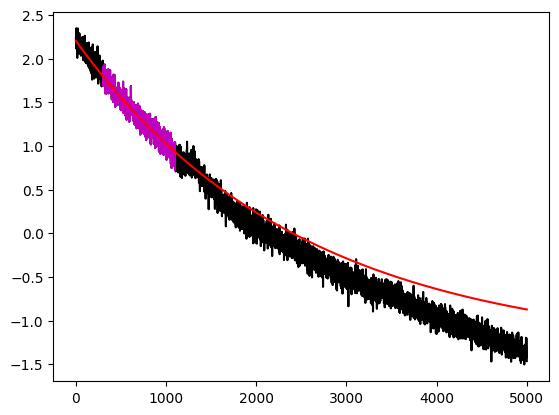

In [56]:
def exp_func(xdata,a,b,c):
    return a*np.exp(xdata/-b) + c

def doub_exp_func(xdata,a1,a2,b1,b2,c):
    return a1*np.exp(xdata/-b1) + a2*np.exp(xdata/-b2) + c

fit_range=np.arange(300,1100)

p0_1 = [3,2000,-10]
p0_2 = [3,3,2000,2000,-10]
xdata = np.arange(len(im[:,1]))
xdata_trunk = xdata[fit_range]
ydata=im[:,1][fit_range]
p = scipy.optimize.curve_fit(exp_func, xdata_trunk, ydata,p0=p0_1)
# print(p)

fig,ax=plt.subplots()
ax.plot(im[:,1],'k')
ax.plot(xdata_trunk,ydata,'m')
ax.plot(exp_func(xdata,*p[0]),'r')

In [8]:
# decay = doub_exp_func(xdata,*p[0])
# im = im - np.expand_dims(decay,1)
# fig,ax=plt.subplots()
# ax.imshow(im.T)
# plt.colorbar()

In [ ]:
# def exp_func_err(xdata,ydata,a,b,c):
    # xdata = np.expand_dims(xdata,1)
    # return np.sum(np.abs(ydata - a*np.exp(xdata/-b) + c).flatten())

im_test = im

fit_range=np.arange(500,1100)
xdata =  np.expand_dims(np.arange(im.shape[0]),1) * np.ones_like(im)
xdata_trunk=xdata[fit_range,1]
ydata = im_test[fit_range,:]
p0_1 = [8,6000,-4]
a=np.ones((1,im_test.shape[1]))*p0_1[0]
b=np.ones((1,im_test.shape[1]))*p0_1[1]
c=np.ones((1,im_test.shape[1]))*p0_1[2]



def exp_func(xdata,a,b,c):   
    a = np.expand_dims(a,1).T
    b = np.expand_dims(b,1).T
    c = np.expand_dims(c,1).T

    # print(a.shape,b.shape,c.shape)
    xdata = np.expand_dims(xdata,1)
    return a*np.exp(xdata/-b) + c

def exp_func_err(abc,xdata,ydata):    
    n = ydata.shape[1]
    # print(n)
    yhat = exp_func(xdata,abc[0:n],abc[n:n*2],abc[n*2:n*3])
    er = np.sum(np.square(ydata - yhat).flatten() )
    print(er)
    return er


abc = np.stack((a,b,c),0)
abc = abc.flatten()
# yhat = exp_func(xdata_trunk,abc[0:n],abc[n:n*2],abc[n*2:n*3])

res = scipy.optimize.minimize(exp_func_err, abc, args=(xdata_trunk,ydata),options={'maxiter':200,'disp':True})
# n=50
# 
# 
# 

In [ ]:
result = res['x']
yhat = exp_func(xdata_trunk,result[0:n],result[n:n*2],result[n*2:n*3])
plt.imshow(yhat.T)

In [ ]:
# print(res)
# f= res['x']
# plt.plot(f)


In [ ]:
# from matplotlib import pyplot as plt
# from sklearn.decomposition import FastICA, TruncatedSVD, SparsePCA
# # import sklearn

In [ ]:
# from sklearn.decomposition import NMF
# n_components=12
# offset = 4
# model = NMF(n_components=n_components, init='random', random_state=0)
# W = model.fit_transform(im_r+offset)
# H = model.components_
# fig,ax=plt.subplots()
# ax.plot(W ) 

# h_r = np.reshape(H,[n_components,im_shape[1], im_shape[2]])
# fig,ax=plt.subplots(2,int(n_components/2),figsize=(15,3))
# ax = ax.flatten()
# for ki in range(n_components):
#     ax[ki].imshow(h_r[ki,:,:])

# fig,ax=plt.subplots(2,int(n_components/2),figsize=(15,3))
# ax = ax.flatten()
# for ki in range(n_components):
#     h_i = h_r[ki,:,:]
#     ax[ki].plot( np.sum(h_i,axis=0))
#     ax[ki].plot( np.sum(h_i,axis=1))# , np.arange(im_shape[1])

In [ ]:
# backlist = [0,1,2]

# Background = W[:,backlist] @ H[backlist,:]
# im_corr = im_r - Background - offset
# # im_corr = (im_corr*im_r_std.T) + im_r_avg.T
# plt.imshow(im_corr.T)
# plt.colorbar()
# im_corr = np.reshape(im_corr,[im_shape[0],im_shape[1], im_shape[2]])

In [ ]:
# tifffile.imwrite('/content/my_tiff_corr.tiff', im_corr) #, imagej=True
# print('downloading')
# colab.files.download('/content/my_tiff_corr.tiff')

In [ ]:
# from sklearn.utils.extmath import randomized_svd
# n_components = 12
# u, s, vt = randomized_svd(im_r,n_components=n_components,n_iter=5,random_state=None)
# fig,ax=plt.subplots()
# ax.plot(u)
# ax.legend(np.arange(n_components))
# vt_r = np.reshape(vt,[n_components,im_shape[1], im_shape[2]])
# fig,ax=plt.subplots(2,int(n_components/2),figsize=(10,3))
# ax = ax.flatten()
# for ki in range(n_components):
#     ax[ki].imshow(vt_r[ki,:,:])


In [ ]:

# ica = FastICA(n_components=n_components,random_state=0,whiten='unit-variance')
# im_trans =  ica.fit_transform(im_r_n.T)
# A_ = ica.mixing_  # Get estimated mixing matrix
# plt.plot(A_)
# plt.show()
# plt.plot(im_trans.T)
# plt.show()